**Introduction and EDA**


As outlined in the project scoping document, our task is to predict the sales price of houses as accurately as possible using a multivariate linear regression.

Our approach will involve the following steps:

1) Hypothesising about the data - without looking at the data in any detail, thinking about which features may influence our target (sales price)

2) Carrying out initial exploratory analysis to get a feel for the data and plotting our first charts to explore whether the features we hypothesised about are meaningful and whether their influence on sales price is worth exploring further

3) Cleaning the data, based on the features we are interested in exploring (meaning it will be easier to manipulate), getting rid of any outliers and dropping null values or replacing them with meaningful or placeholder values instead

4) Undertaking linear regression using different features to see which (combination) most accurately predicts sales price.

**Step 1: Hypotheses about our data**

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Hypotheses to investigate**

Given the overview of the data we have available, we would like to investigate the following questions through EDA:

1) Will larger houses with the a waterfront view have a higher salesprice? Do other factors influence this?

2) Do older houses have a higher price? Will this be influenced by whether a house has been renovated or not?

3) Will houses with a higher grade have a higher price? Does the zipcode of a house influence this?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The .info() function gives us a concise summary of our table - we can see that there are 21597 rows of data (entries or houses). However, it also tells us that three of the features are missing values: waterfront; view; and year renovated. We will need to decide if what to do with these missing values if we are interested in investigating these factors further.

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Using the describe function gives us a statistical description of the dataframe. We can easily spot outliers, trends and patterns for our dataset as a whole. From it we can tell, for example, that:
- the most expensive house, which costs over USD 7 million, seems to be an outlier, given that the average house price is USD 500000
- there is a house with 33 bedrooms, which seems huge (it might be an outlier, or a mistake)
- most houses don't have a waterfront view (assuming '1' means the house has a waterfront view; we can investigate this further below)
- the grades given to houses in our dataset run from 3 to 13 (although we can assume that the grading system runs from 1 to 13 - we still don't know what these grades represent)
- the mean year when houses in the dataset were built is 1970.

**Step 2: Answering our initial questions through exploratory data analysis**

1) Will larger houses with the a waterfront view have a higher salesprice? Do other factors influence this?

2) Do older houses have a higher price? Will this be influenced by whether a house has been renovated or not?

3) Will houses with a higher grade have a higher price? Does the zipcode of a house influence this?

Firstly, we can use .corr() to get an overview of which factors are correlated. Using .corr() with our dataframe will return the pairwise correlation for all columns in our dataframe.

This will help us to answer questions (1), (2), (3) and (4), but not (5).

In [10]:
correlations_initial = df.corr()
correlations_initial

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


The above gives us the pairwise correlation for all columns in the dataframe. Any null values are automatically excluded from the output. The closer the correlation coefficient is to 1, the stronger the strength of association is between two features.

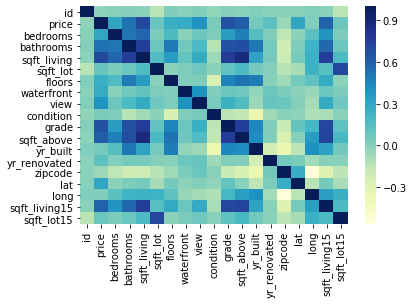

In [11]:
ax = sns.heatmap(correlations_initial, cmap="YlGnBu")

This gives us a heatmap of the pariwise correlation for all the columns in the dataframe. The darker the blue, the closer the correlation is to 1, and the stronger the strength of association is between two features.

**Initial thoughts**

Looking at the pairwise correlation above, we have an initial feel for answers to our questions:

**1) Will larger houses with a waterfront view have a higher salesprice? Do other factors influence this?**

The price of a house seems to be highly correlated with its area in sq feet. It would be interesting to explore whether additional factors influence this.

Despite the fact that the correlation between the price of a house and whether it has a view of the waterfront is relatively low (0.39) compared with the other three factors, it might be worth investigating as part of EDA because we know that having a view of the waterfront will be an attractive feature. We also know that the number of houses with a waterfront view is low (which could affect the correlation number above). We want to investigate the effect that the view of a waterfront will have on the other three factors above.

**2) Do older houses have a higher price? Will this be influenced by whether a house has been renovated or not?**

We need to carry out further investigation to see whether the house a year was built influences its sales price - the pairwise correlation can't tell us this. We will need to create a new column for the age of each house and plot that against the sales price of each house.

**3) Will houses with a higher grade have a higher price? Does the location of a house influence this?**
There seems to be a high correlation between a house's grade and its price. We will need to carry out some further investigation to see if a house's zipcode will also influence a house's price, and if so, how it does this.

**Things to consider**

We must be wary of variables which have a high degree of correlation between themselves (independently of the target or sales price) because they are related or are repetitions of the same kind of information (eg. subsets of each other). This is known as multicolinearity. Inclusion of such factors together will have an adverse effect on our final model, since their influence will be amplified and their combined weight will cause the model to over-estimate their importance/influence on the target (sales price).

Examples of multicolinearity may include the area of a home in sq foot and the number of bathrooms - this is because the bigger the area of a house, the more bathrooms it is likely to have (we can see that the correlation between sqft living and number of bathrooms is 0.75). A second example might be being wary of including both the grade of a home and its area in sq foot in our final model - its seems that they are multicolinear (their correlation is 0.76).

**Exploring each of our hypotheses above**

**1) Will larger houses with a waterfront view have a higher salesprice? Do other factors influence this?**


Firstly, we can plot the area of each house against its price using a scatter plot to investigate their relationship more closely.

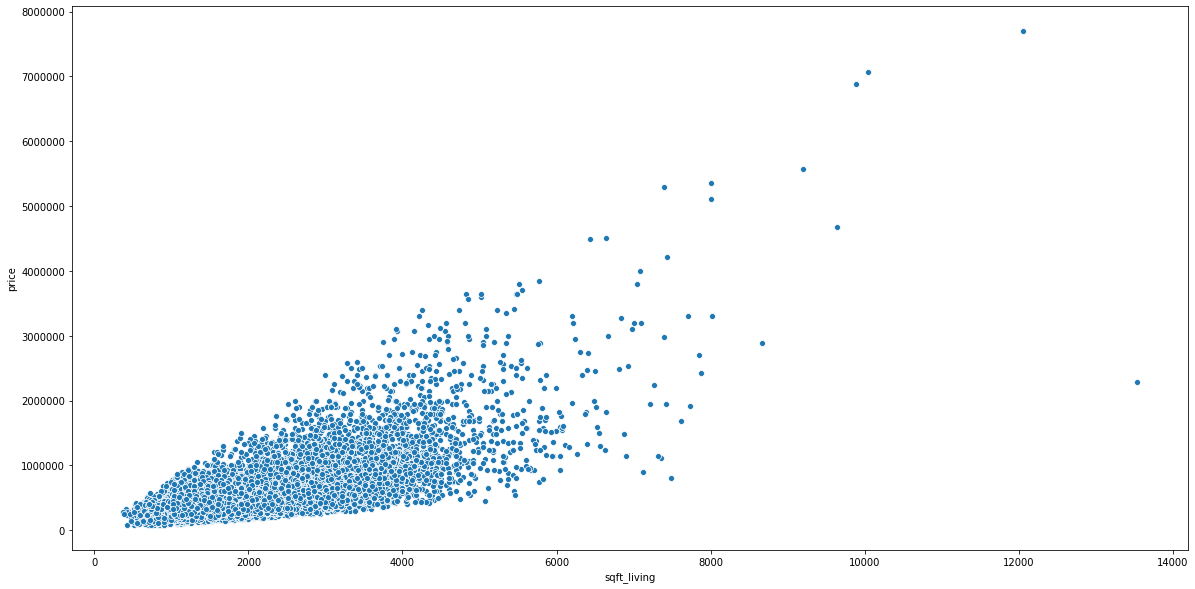

In [14]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price",
                      data=df)

There seems to be a strong trend here: as the area of a house in square foot increases, so does the price of the house. However, there are clearly outliers - there seems to be a very large house, for example, and one very expensive and large house. We will need to deal with outliers during data cleaning to ensure that these don't affect our linear regression model.

The 'waterfront' factor tells us whether a property has a view of the waterfront or not.

Given that having a view of a waterfront is a rare and sought-after feature for a house, it seems likely that '1' equates to a property having a view of the waterfront.

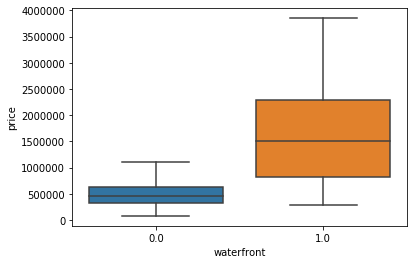

In [15]:
sns.boxplot(x = 'waterfront', y = 'price', data = df, showfliers = False)

This boxplot gives us a good idea of the difference in price between those houses with and without a view of the waterfront: the mean house price for houses with a waterfront view is much higher than the mean house price for houses without a waterfront view. The highest price for houses without a waterfront view overlap with the lowest prices for houses with a waterfront view.

We can now plot the price against the sqft living area and waterfront value for each house, to see how these three factors interact.

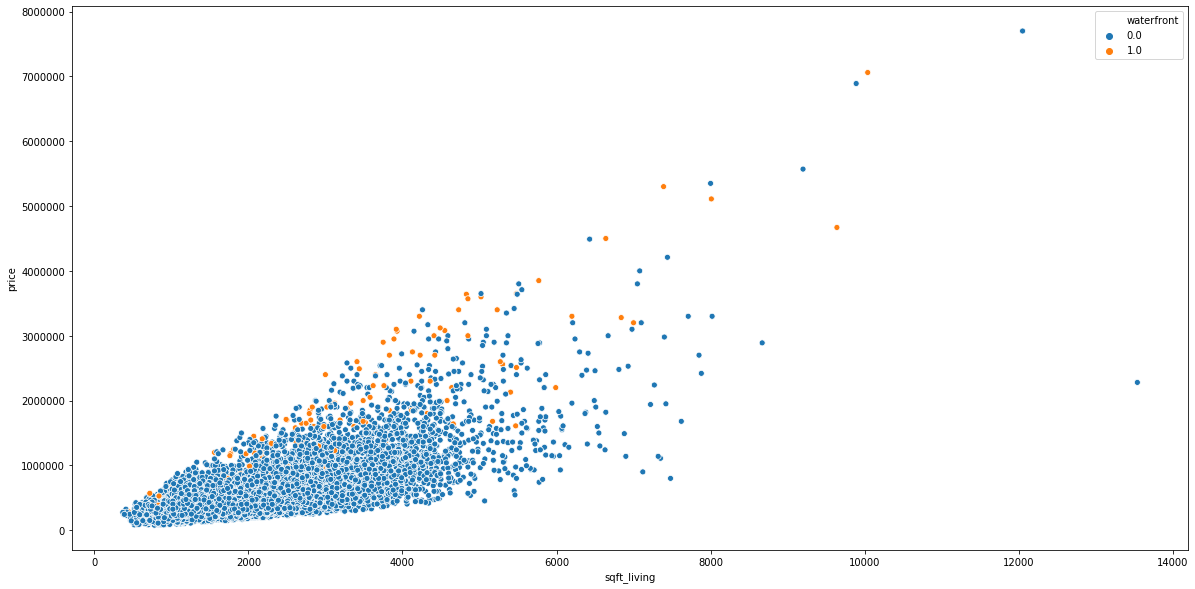

In [16]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price", hue="waterfront",
                      data=df)

As the scatterplot above shows, the houses with a waterfront (denoted in orange) are at the higher end of the price range. The bigger the house gets, the more likely it is to have a waterfront.

We can also see how the price of a house interacts with its living size and the number of bathrooms it has.

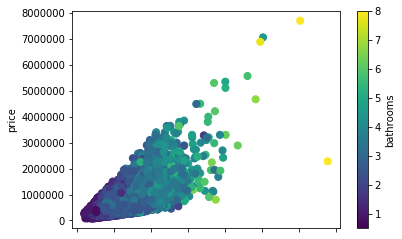

In [19]:
df.plot.scatter(x='sqft_living', y='price', c='bathrooms', s=50, colormap='viridis');

We can see from the scatter plot above that larger houses with higher sales prices also have a large amount of bathrooms. One might expect this since the size of a house will strongly influence how many bathrooms it might have.

We can also see how the price of a house interacts with its living area and the number of times it has been viewed.

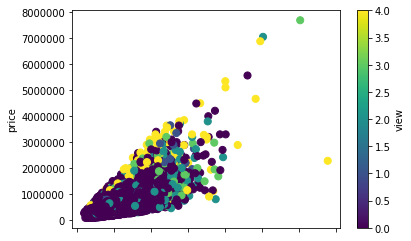

In [21]:
df.plot.scatter(x='sqft_living', y='price', c='view', s=50, colormap='viridis');

This shows that the more expensive a house is, the larger it will be and the more times it will be viewed. It seems that if a house is small, it will be viewed more frequently if it is higher in price.

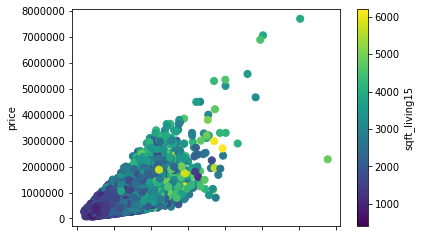

In [22]:
df.plot.scatter(x='sqft_living', y='price', c='sqft_living15', s=50, colormap='viridis');

This suggests that the area in sq feet of a house is related to the area of houses it is surrounded by: the larger the mean area of a house's neighbours, the larger a house's area will be, and the higher the price.

**2) Do older houses have a higher price? Will this be influenced by whether a house has been renovated or not?**


For this, we need to create a new column which will include how old the house is. We must also convert the 'date' column (which indicates the date a house was sold) into showing the year only.

In [23]:
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [24]:
df['sales_year'] = df.date.map(lambda x: '{}'.format(x[-4:]))

In [25]:
df_with_sales_year = df

In [26]:
df_with_sales_year.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [27]:
df['yr_built'].dtype

dtype('int64')

In [28]:
df['sales_year'].dtype

dtype('O')

In [31]:
df_with_sales_year['sales_year'] = df_with_sales_year['sales_year'].astype(int)

In [32]:
df_with_sales_year.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [34]:
df_with_sales_year['age_house'] = df_with_sales_year['sales_year'] - df_with_sales_year['yr_built']

df_with_sales_year.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28


If we plot the price of a house against the year it was built, we should get a feel for whether the two factors are related.

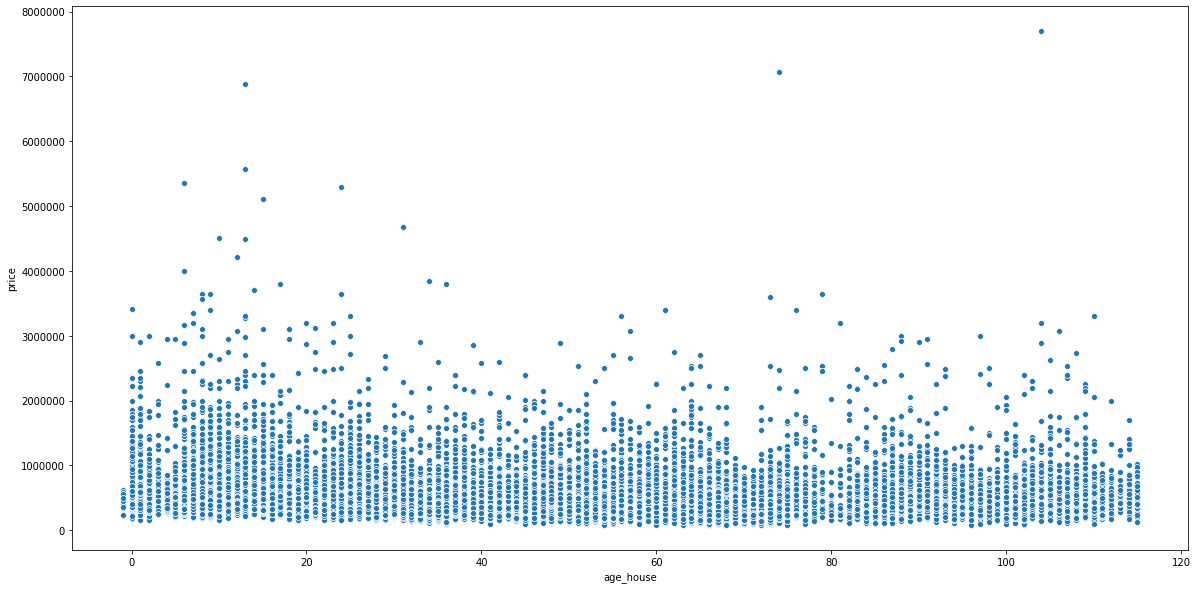

In [35]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="age_house", y="price",
                      data=df)

From the scatter plot above, it doesn't seem as though the age of a house influences the sales price. As we can see, the older houses do not have higher prices.

We can plot whether a house has been renovated against its price.

In [37]:
df['yr_renovated'].dtype

dtype('float64')

In [39]:
df['yr_renovated'].head()

0       0.0
1    1991.0
2       NaN
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

In [40]:
df['yr_renovated'].value_counts

<bound method IndexOpsMixin.value_counts of 0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          NaN
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          NaN
24          0.0
25          0.0
26          NaN
27          0.0
28          NaN
29          0.0
          ...  
21567       0.0
21568       0.0
21569       0.0
21570       0.0
21571       0.0
21572       0.0
21573       0.0
21574       0.0
21575       NaN
21576       NaN
21577       NaN
21578       0.0
21579       NaN
21580       0.0
21581       NaN
21582       0.0
21583       NaN
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590       0.0
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21595       

In [42]:
df['yr_renovated'].isna().sum()

3842

In [55]:
df.loc[df['yr_renovated'] == 0.0, "renovated"]= '0'

In [56]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,age_house,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,0


In [57]:
df.loc[df['yr_renovated'] != 0.0, "renovated"]= '1'

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,age_house,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,0


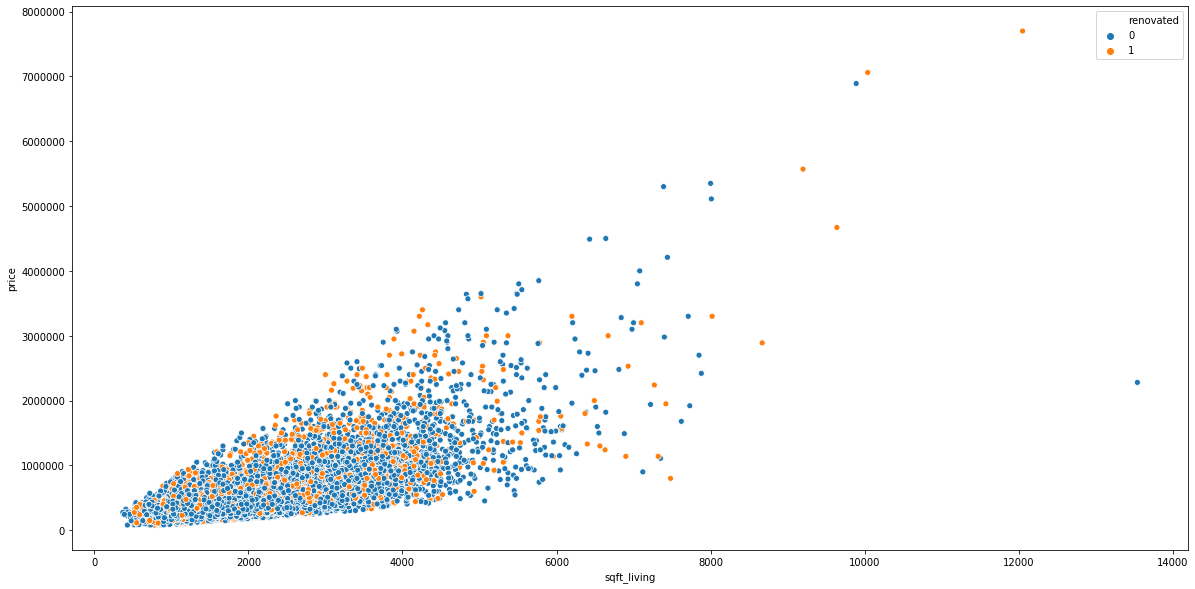

In [60]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price", hue="renovated",
                      data=df)

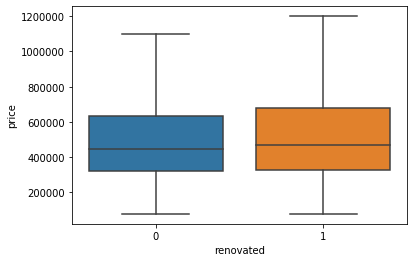

In [61]:
sns.boxplot(x = 'renovated', y = 'price', data = df, showfliers = False)

This can be confirmed by the boxplot above: the mean price for a house which has been renovated is very similar to the mean price for a house which has not.

There doesn't seem to be a strong enough correlation here: houses which have been renovated are neither more expensive or bigger than those which are not.

**3) Will houses with a higher grade have a higher price? Does the location of a house influence this?**

Firstly, let's plot the price of a house against its grade.

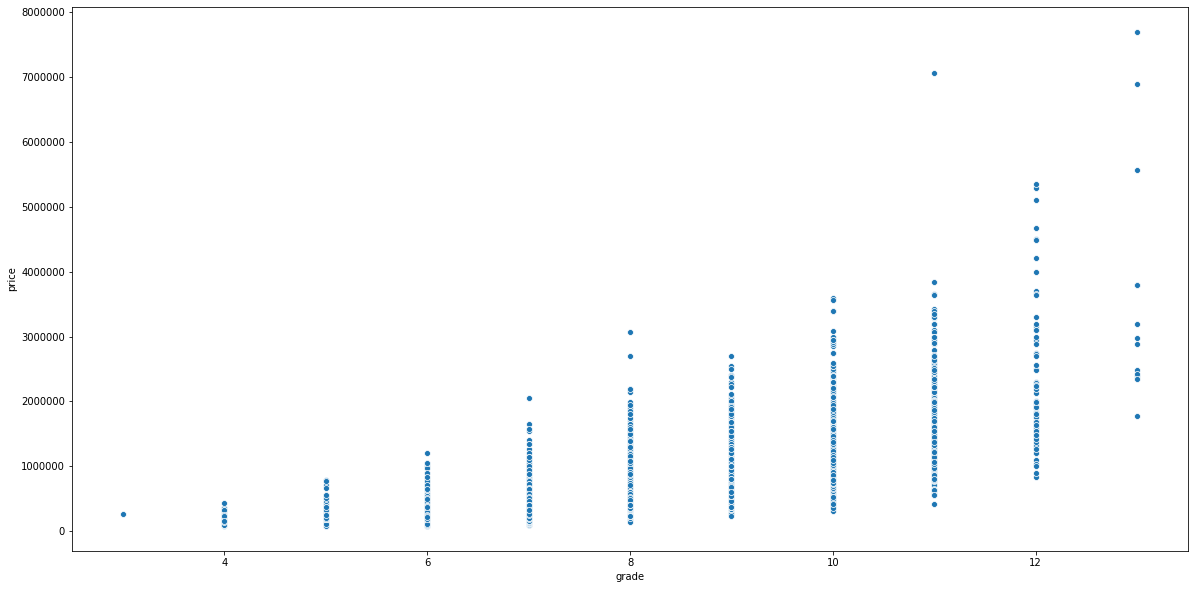

In [65]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="grade", y="price",
                      data=df)

There does seem to be a trend here: the higher the grade of a house, the higher its price.

We can plot the latitude and longitude of a house against its price, and see if we achieve anything meaningful.

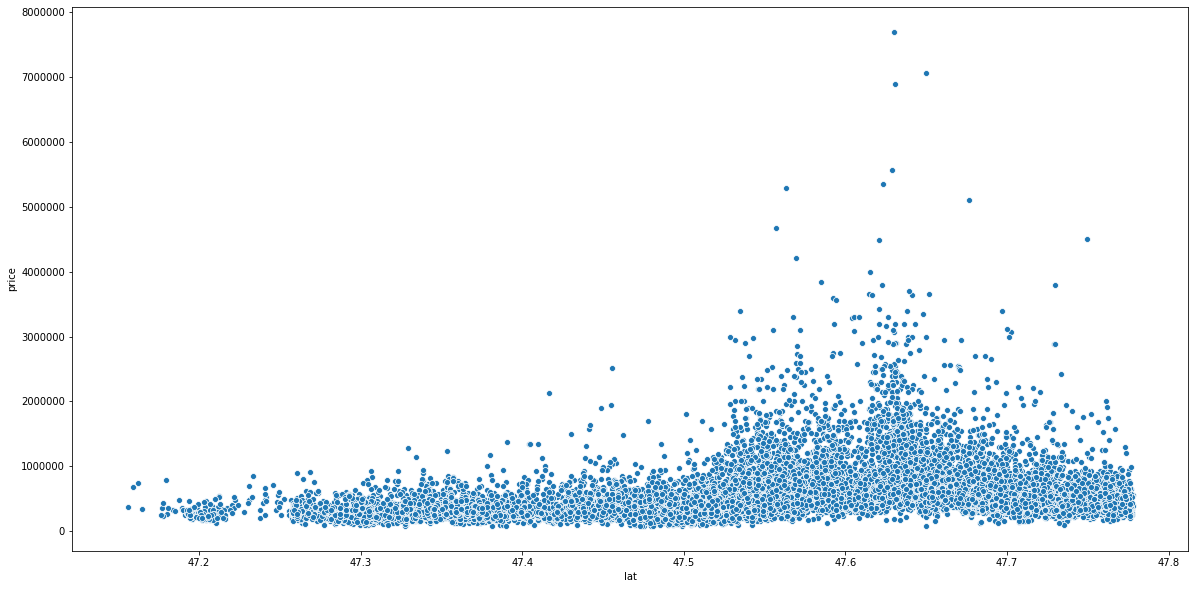

In [69]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price",
                      data=df)

It seems that the latitude of a house does influence its price: houses with a higher latitude have a slightly higher price.

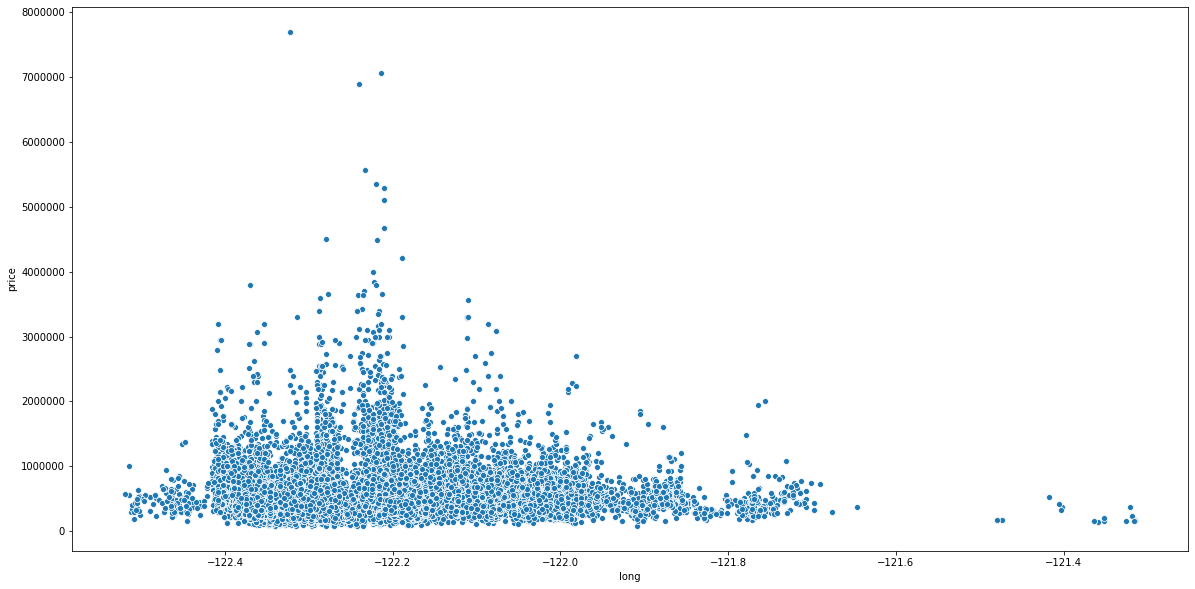

In [67]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="long", y="price",
                      data=df)

The longitude of a house does seem to influence the price of a house: houses with lower longitudes have slightly lower prices than those without (although we don't have enough houses with lower longitudes to tell this).

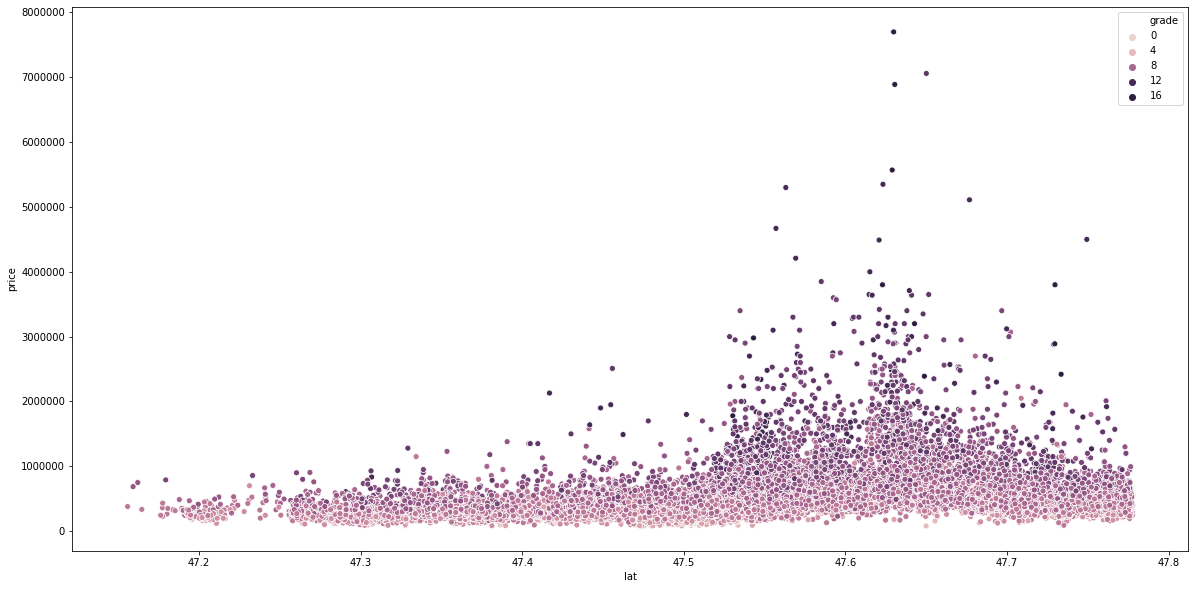

In [71]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price", hue="grade",
                      data=df)

This seems to suggest that the higher the price of a house is, the higher its grade and the higher its latitude.

Let's plot the square foot living of a house against its latitude and price.

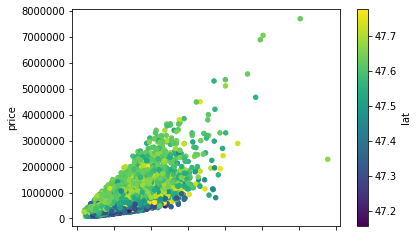

In [73]:
ax2 = df.plot.scatter(x='sqft_living',
                       y='price',
                      c='lat',
                      colormap='viridis')

Based on EDA, we are interested in the following:

- the sq foot living area of a house and whether it has a waterfront or not, and how these two conditions interact with other factors to influence the price


- the grade of a house and its latitude, and how these two conditions interact with other factors to influence the price.